----------
属于：Linear Layers
----------

-----------------

学习：
linear顾名思义是线性的，即输出是由kx+b的形式决定的

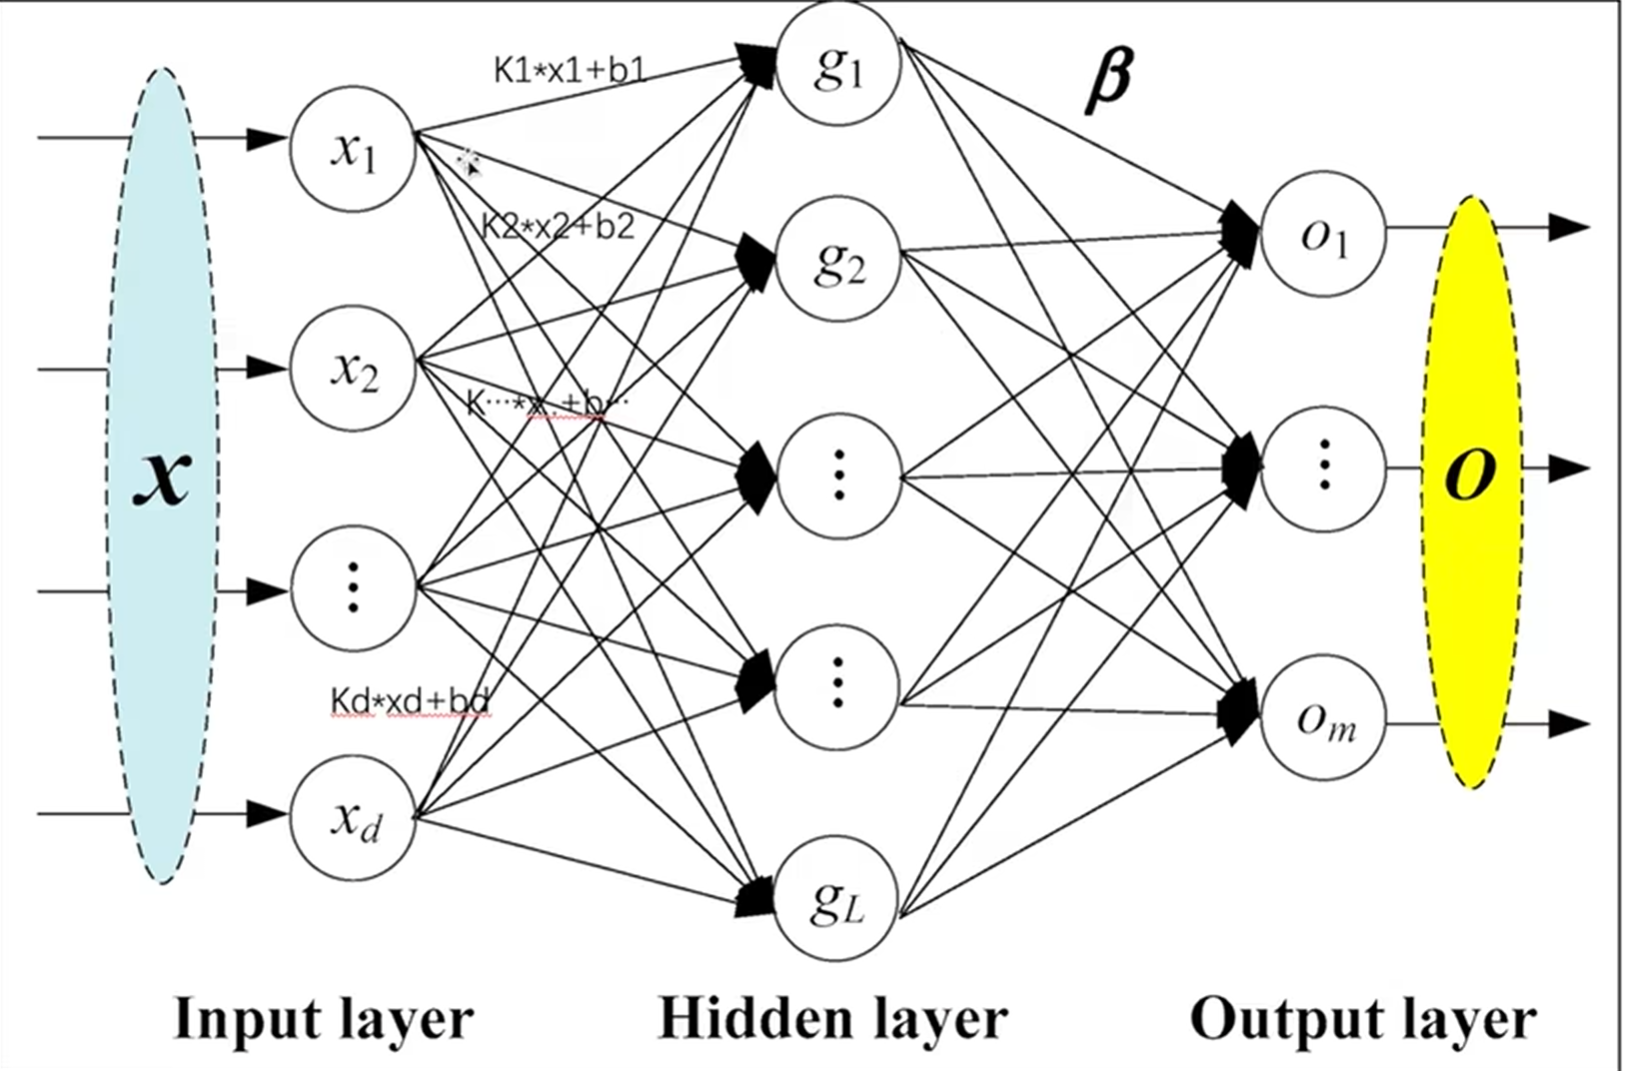

<mark>语法：</mark>class torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)

<mark>**Parameters：**</mark>

**in_features (int)**– size of each input sample

**out_features (int)** – size of each output sample

**bias (bool)** – If set to False, the layer will not learn an additive bias. Default: True

weight和bias都是从某种分布中采样得来的

---------------------

现在我们来完成类似于这样的一个任务：

将5x5的输入转化成1x25，再用linear层转化为1x3（vgg model）

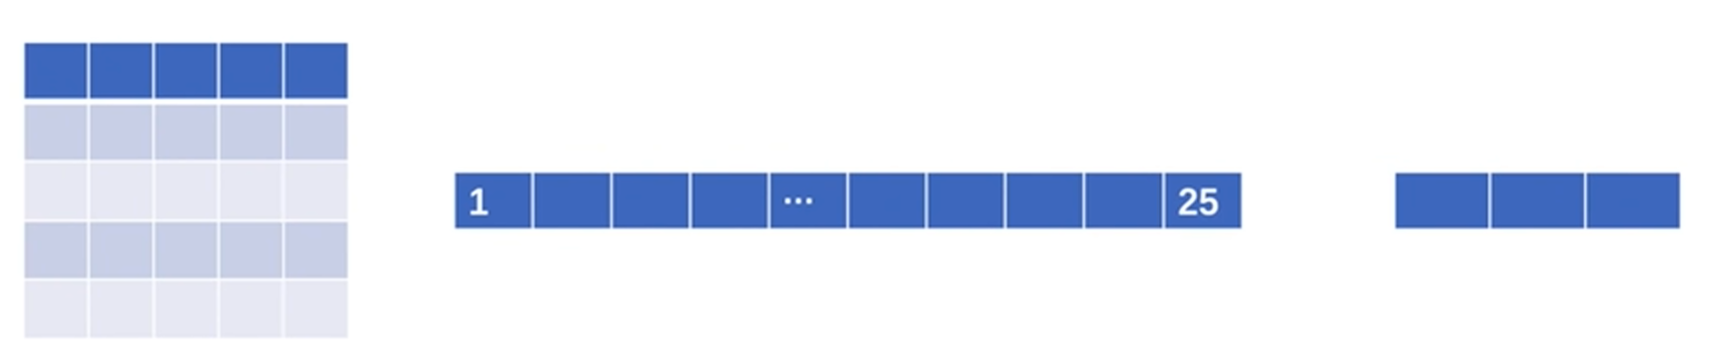

In [1]:
import torchvision
dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=torchvision.transforms.ToTensor())

from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=64)

In [2]:
import torch
for data in dataloader:
    imgs, targets = data
    print(imgs.shape)
    output = torch.reshape(imgs, (1, 1, 1, -1))
    print(output.shape)
    break

torch.Size([64, 3, 32, 32])
torch.Size([1, 1, 1, 196608])


In [6]:
#写网络结构
from torch import nn
from torch.nn import Linear
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.linear = Linear(196608, 10)  #这句话的意思是：将196608的input经过线性层转化为10的output

    def forward(self, input):
        output = self.linear(input)
        return output

In [ ]:
tudui = Tudui()

for data in dataloader:
    imgs, targets=data
    input = torch.reshape(imgs,(1, 1, 1, -1))  #可以改成:input=torch.flatten(imgs)
    output = tudui(input)
    print(input.shape)
    print(output.shape)
    break

torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 10])


<span style="color:red">**其实，我们想把一个张量展平，也可以用torch.flatten**</span>

In [ ]:
t = torch.tensor([[[1, 2],[3, 4], [5, 6]],
                  [[7, 8], [9, 10], [10, 11]]])
print(t)

# t = torch.flatten(t)
# print(t)

t = torch.flatten(t, start_dim=1) #start_dim即start dimension，从第几维开始压平
print(t)

tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [10, 11]]])
tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 10, 11]])
